# Stroke Data Analysis

**This is a simple Exploratory Data Analysis to find out the correlations between certain factors e.g. age, gender, etc. to stroke.**

In [1]:
# Get dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
# Load data. (Data taken from Kaggle.)
df = pd.read_csv('./datasets/stroke prediction/healthcare-dataset-stroke-data.csv')

In [ ]:
# Check the loaded dataframe

# df.head()
# df.describe()
# df.info()
# df.shape

In [3]:
# Clean the dataset

# Remove the random original ID
df = df.drop('id', axis=1)

# Remove indexes with missing bmi value
df = df.dropna(axis=0, how='any')

## Data Visualization

It has been initially assumed that other health conditions may increase the likelihood of getting stroke (dubbed as co-morbidity in medical term), and therefore they might be good indicators of stroke.

For starters, general insights will be drawn from graph analysis.

### General Insights

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

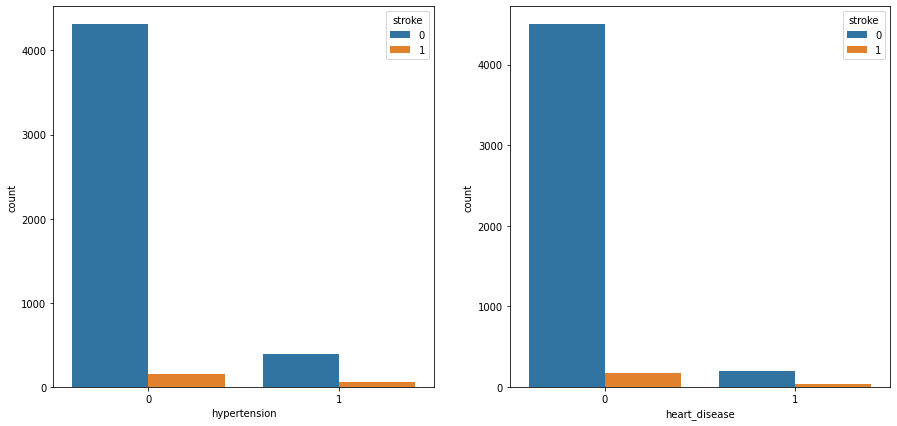

In [4]:
# Check co-morbidity correlations

# Hypertension vs Stroke and Heart Disease vs Stroke
fig, axes = plt.subplots(1,2, figsize=(15,7))
sns.countplot(data= df, x="hypertension", hue="stroke", ax= axes[0])
sns.countplot(data= df, x="heart_disease", hue="stroke", ax= axes[1])

# NUMERICAL ANALYSIS REQUIRED

From the graphs above, it would seem that **there is no apparent correlation between hypertension and stroke, as well as between heart disease and stroke.**

More analysis were done to gather more insights on stroke prediction.

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

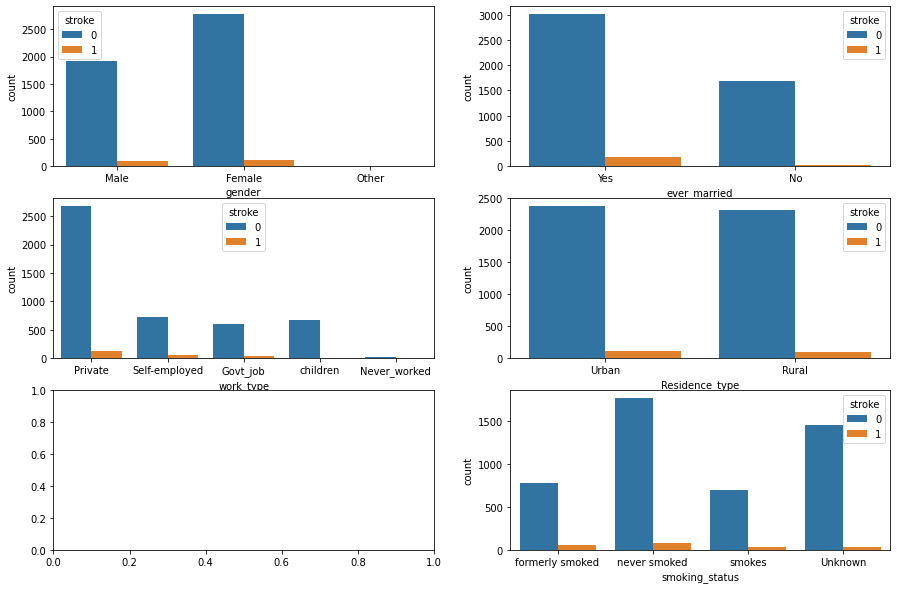

In [5]:
# Check for hidden correlations (Categorical type)

fig, axes = plt.subplots(3,2, figsize=(15,10))
sns.countplot(data= df, x="gender", hue="stroke", ax= axes[0,0])
sns.countplot(data= df, x="ever_married", hue="stroke", ax= axes[0,1])
sns.countplot(data= df, x="work_type", hue="stroke", ax= axes[1,0])
sns.countplot(data= df, x="Residence_type", hue="stroke", ax= axes[1,1])
sns.countplot(data= df, x="smoking_status", hue="stroke", ax= axes[2,1])

# NUMERICAL ANALYSIS FOR GENDER AND EVER_MARRIED REQUIRED

There are a few general insights that can be drawn from the graphs above:
1. The ratio of sample size of Male patients with stroke is higher than that of the Female patients.
2. the ratio of married patient with stroke is higher than that of the unmarried patients.
3. Work type does not have direct conclusion. Thorough numerical analysis is required.
4. Residence types have similar stroke ratio. No correlation between residence types and stroke.
5. The ratio of stroke patients who never smoked is similar to that of the patients who smoke.

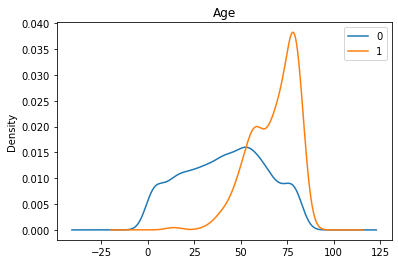

In [6]:
# Check for hidden correlations (Numerical type)

# Age trend
df.groupby('stroke')['age'].plot.density(title='Age')
plt.legend()
plt.show()

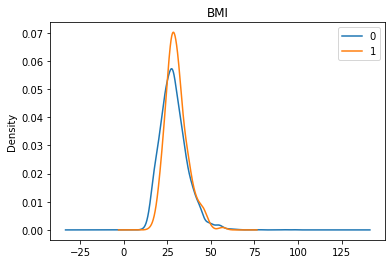

In [7]:
# BMI trend
df.groupby('stroke')['bmi'].plot.density(title='BMI')
plt.legend()
plt.show()

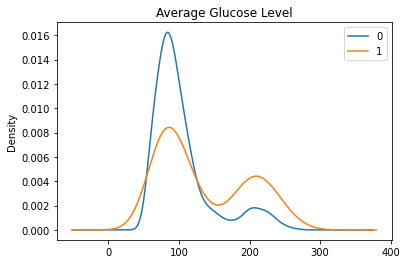

In [8]:
# Average glucose level trend
df.groupby('stroke')['avg_glucose_level'].plot.density(title='Average Glucose Level')
plt.legend()
plt.show()

From the trends above, there are a few general insights:
1. The stroke ratio increases as age increases (a drop at ~100 years mark is due to lack of sample data).
2. There is no apparent correlation between BMI and stroke.
3. At higher Average Glucose Level, the ratio of stroke patients increases.

## Conclusion

From the visual analysis above, the general insights can be summarized as such:
* Increasing age has the strongest correlation with stroke.
* Increasing glucose level has strong correlation with stroke.
* People who get married seem to skew towards higher probability of stroke.
* Males tend to have higher probability of stroke.
* Initial assumptions made by the author that co-morbidities and smoking history to have significant effect on stroke were proven to be false.

**Note: to get more definitive results, more rigorous statistical analysis must be done. It is also not known how all the factors in the data compound one another, hence there may be uncertainties in the conclusions.**

## Future Work

While the data provide some insights as to what factors may be correlated to/ compounding to the increased probability of stroke, it currently has no practical value and is only treated as an academic study.

It is proposed to create a supervised learning analysis to have a prediction based on a set of test data to validate whether the conclusions are applicable as predictors of stroke.

It is also proposed to create a form web app where users can input their gender, age, etc. and predict their likelihood of stroke from the users' input. This will also enrich the dataset in the backend as we can obtain more sample, and possibly improve the accuracy of the analysis.